# ML c учителем

## Давыдова Елизавета
### Т12-101М-20

In [94]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

%matplotlib inline
np.set_printoptions(precision=4)

df_source = pd.read_csv(
    'Documents/client_segmentation.csv', 
    dtype={'call_diff': np.float32, 'call_diff': np.float32, 'traffic_diff': np.float32, 'customes_class': np.uint16}
)
X = df_source[['call_diff','sms_diff','traffic_diff']].values
y = df_source.customes_class.values

df_source.head(5)

,call_diff,sms_diff,traffic_diff,customes_class
0,-0.666421,0.444911,-0.273538,0
1,-0.889273,-0.537896,-1.959469,2
2,-0.841503,0.846665,0.727606,0
3,1.389749,0.390911,1.789246,1
4,-1.228211,-1.375899,-1.434209,2


Найти лучший классификатор по метрике f1-score

In [95]:
from sklearn.tree  import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split

Дерево решений для классификации

In [96]:
res_metrics = {}
clf1 = DecisionTreeClassifier()
clf1.fit(X, y)
y_pred1 = clf1.predict(X)

Оценим данный алгоритм по метрике f1-score

In [97]:
metr1 = f1_score(y, y_pred1, average='micro')
print(metr1)
res_metrics['decision tree'] = metr1

1.0


Наивный байесовский классификатор (Гаусс)

In [98]:
clf2 = GaussianNB()
clf2.fit(X, y)
y_pred2 = clf2.predict(X)

Оценим данный алгоритм по метрике f1-score

In [99]:
metr2 = f1_score(y, y_pred2, average='micro')
print(metr2)
res_metrics['Gaussian'] = metr2

0.9500000000000001


Алгоритм KNN

In [100]:
clf3 = KNeighborsClassifier()
clf3.fit(X, y)
y_pred3 = clf3.predict(X)

Оценим данный алгоритм по метрике f1-score

In [101]:
metr3 = f1_score(y, y_pred3, average='micro')
print(metr3)
res_metrics['KNN'] = metr3

0.98


Логистическая регрессия

In [102]:
clf4 = LogisticRegression()
clf4.fit(X, y)
y_pred4 = clf4.predict(X)

Оценим данный алгоритм по метрике f1-score

In [103]:
metr4 = f1_score(y, y_pred4, average='micro')
print(metr4)
res_metrics['Logistic Regression'] = metr4

0.98


"Случайный лес"

In [104]:
clf5 = RandomForestClassifier()
clf5.fit(X, y)
y_pred5 = clf5.predict(X)

Оценим данный алгоритм по метрике f1-score

In [105]:
metr5 = f1_score(y, y_pred5, average='micro')
print(metr5)
res_metrics['Random Forest'] = metr5

1.0


Алгоритмы дерево решений и "случайный лес" показали наилучшие результаты предсказания.

In [106]:
print(res_metrics)
res_metrics_sort = sorted(res_metrics.items(), key=lambda x: x[1], reverse=True)
metric, res = res_metrics_sort[0]
print(f'Лучший классификатор по метрике f1 score: {metric} с результатом: {res}')

{'decision tree': 1.0, 'Gaussian': 0.9500000000000001, 'KNN': 0.98, 'Logistic Regression': 0.98, 'Random Forest': 1.0}
Лучший классификатор по метрике f1 score: decision tree с результатом: 1.0


## Валидация моделей линейной регрессии
Пользуясь методом .score подберите наилучшее значение степени полинома

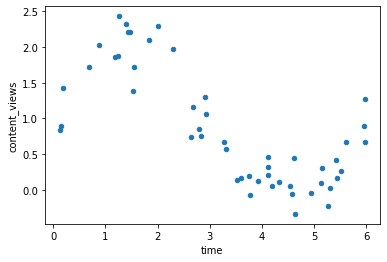

In [13]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('Documents/content_views_toy_set.csv', encoding='utf8')
df.plot.scatter(x='time', y='content_views')
plt.show()

X = df['time'].values
y = df['content_views'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
reg = LinearRegression().fit(X_train.reshape(-1, 1), y_train)

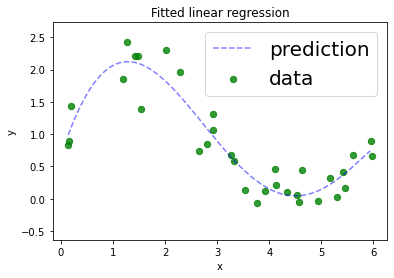

In [14]:
def generate_degrees(source_data: list, degree: int):
    """Функция, которая принимает на вход одномерный массив, а возвращает n-мерный
    Для каждой степени от 1 до  degree возводим x в эту степень
    """
    return np.array([
          source_data**n for n in range(1, degree + 1)  
    ]).T

X_train_5 = generate_degrees(X_train, 5)
X_test_5 = generate_degrees(X_test, 5)
reg_5 = LinearRegression().fit(X_train_5, y_train)

# строим график
margin = 0.3
support = np.arange(X.min(), X.max(), step=0.1)

X_test_support = generate_degrees(support, 5)
y_hat = reg_5.predict(X_test_support)

plt.plot(support, y_hat, 'b--', alpha=0.5, label='prediction')
plt.scatter(X_train, y_train, 40, 'g', 'o', alpha=0.8, label='data')
plt.xlim(X.min() - margin, X.max() + margin)
plt.ylim(y.min() - margin, y.max() + margin)
plt.legend(loc='upper right', prop={'size': 20})
plt.title('Fitted linear regression')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [19]:
degrees = 5
scores = {}

for i in range(1, degrees+1):
    X_train_d = generate_degrees(X_train, i)
    reg_d = LinearRegression().fit(X_train_d, y_train)    
    X_test_d = generate_degrees(X_test, i)    
    scores[i] = reg_d.score(X_test_d, y_test)

sorted_scores = sorted(scores.items(), key=lambda x: x[1], reverse=True)

deg, res = sorted_scores[0]

print(f'Лучшее значение степени полинома: {res}, степень: {deg}')

Лучшее значение степени полинома: 0.9313123641187703, степень: 3
